In [1]:
# Database Interaction and Data Manipulation in Python
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Path Configuration for Custom Module Imports
# -----------------------------------------------------------------------
import sys
sys.path.append('../')  # Adds the parent directory to the path for custom module imports

# Importing Custom Functions
from src.support_db import sql_query
from src.support_queries import *

# Suppressing Warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

### Driver of the Day Analysis

This analysis displays how many times each driver was selected as `Driver of the Day` throughout the 2023 season. 

It provides insight into which drivers were perceived as outstanding by fans in individual races, highlighting both popularity and notable performances.

In [2]:
df_1 = pd.DataFrame(sql_query(query_1))
df_1.columns = ['driver', 'times_chosen']

Query performed successfully.
Database connection closed.


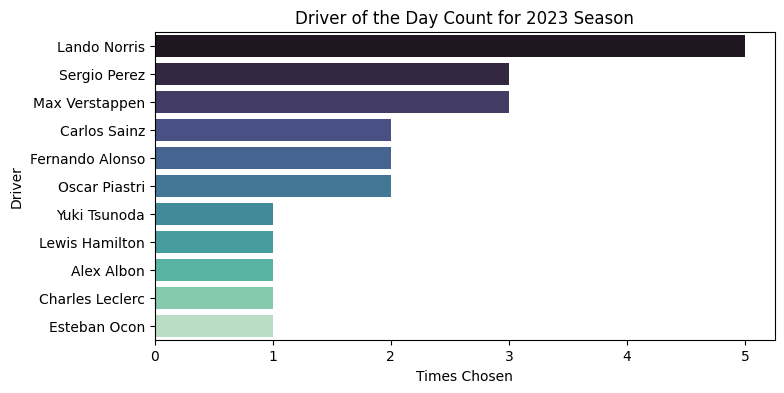

In [3]:
plt.figure(figsize=(8, 4))
sns.barplot(
    x='times_chosen', 
    y='driver', 
    data=df_1, 
    palette='mako'
)
plt.xlabel('Times Chosen')
plt.ylabel('Driver')
plt.title('Driver of the Day Count for 2023 Season')
plt.show()

`Lando Norris` is a very popular driver who managed to secure 5 awards for his performance.

`Sergio Perez` and `Max Verstappen` each earned 2 awards, which is not surprising given that they finished P2 and P1, respectively, in the driver's championship.

### Drivers Championship Standings
This analysis presents the total points accumulated by each driver during the season, ranking them from highest to lowest. It provides a clear overview of the final championship standings, highlighting the most successful drivers.

As previously mentioned, `Max Verstappen` and `Sergio Perez` secured the top two positions in the championship.

In [4]:
df_2 = pd.DataFrame(sql_query(query_2))
df_2.columns = ['Driver', 'total_points']

Query performed successfully.
Database connection closed.


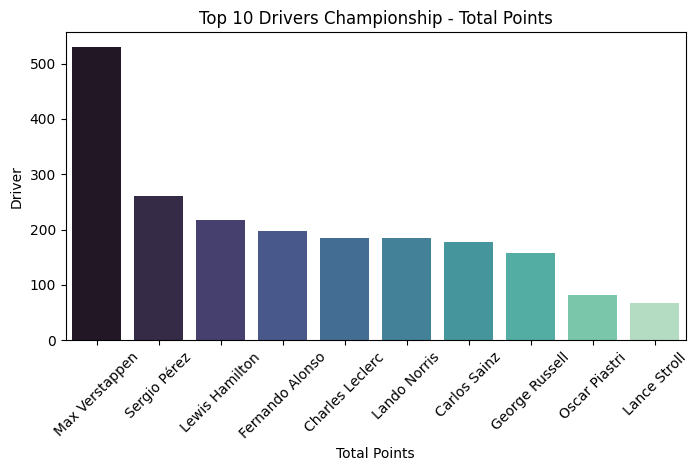

In [5]:
plt.figure(figsize=(8, 4))
sns.barplot(
    y='total_points', 
    x='Driver', 
    data=df_2, 
    palette='mako'
)
plt.xlabel('Total Points')
plt.xticks(rotation=45)
plt.ylabel('Driver')
plt.title('Top 10 Drivers Championship - Total Points')
plt.show()

### Constructors Championship Standings
This analysis shows the points accumulated by each constructor over the season, displaying the overall performance and ranking of the teams. It helps identify which teams were the most competitive and consistent throughout the year.

In [6]:
df_3 = pd.DataFrame(sql_query(query_3))
df_3.columns = ['Constructor', 'total_points']

Query performed successfully.
Database connection closed.


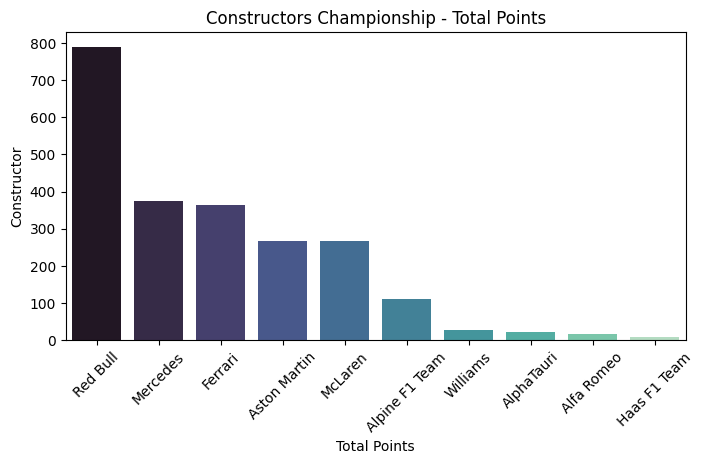

In [7]:
plt.figure(figsize=(8, 4))
sns.barplot(
    y='total_points', 
    x='Constructor', 
    data=df_3, 
    palette='mako'
)
plt.xlabel('Total Points')
plt.xticks(rotation=45)
plt.ylabel('Constructor')
plt.title('Constructors Championship - Total Points')
plt.show()

A staggering display of dominance by Red Bull, driven by the combined results of `Max Verstappen` and `Sergio Perez`, highlighted the strength of the Austrian team. 

Meanwhile, there was more parity between `Mercedes` and `Ferrari`, as well as between `Aston Martin` and `McLaren`.

### Individual Driver Results (`Fernando Alonso`)
This analysis shows the positions obtained by `Fernando Alonso` in each race of the 2023 season. Future analyses could focus on other drivers to provide a broader perspective.

In [8]:
df_4 = pd.DataFrame(sql_query(query_4))
df_4.columns = ['Race Name', 'Position']

Query performed successfully.
Database connection closed.


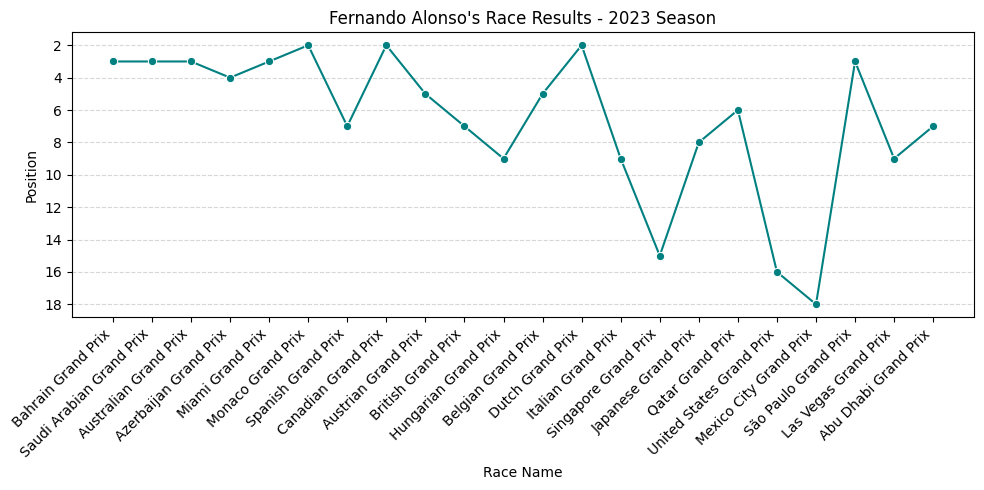

In [9]:
plt.figure(figsize=(10, 5))
sns.lineplot(
    x='Race Name', 
    y='Position', 
    data=df_4, 
    marker='o', 
    color='teal'
)
plt.xlabel('Race Name')
plt.ylabel('Position')
plt.title('Fernando Alonso\'s Race Results - 2023 Season')
plt.gca().invert_yaxis()  # Invertir el eje Y para que las mejores posiciones estén arriba
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


It's clear that `Alonso`'s performance was very strong at the beginning of the season, with a sudden decline after the `Canadian Grand Prix`, followed by some surprising comebacks, such as podium finishes at the `Dutch GP` and the `Sao Paulo GP`.

`Aston Martin` (`Alonso`'s team) started the season with excellent performance but displayed inconsistent results as the season progressed.

### Starting vs. Finishing Positions (Race 2023_1: `Bahrain GP`)
This analysis highlights the starting grid position, finishing position, and positions gained for each driver in the first race of the season, the `Bahrain GP`. Future analyses could focus on other races to provide a more comprehensive view of performance trends.

In [10]:
df_5 = pd.DataFrame(sql_query(query_5))
df_5.columns = ['Driver', 'GridPosition', 'EndPosition', 'PositionsGained']

Query performed successfully.
Database connection closed.


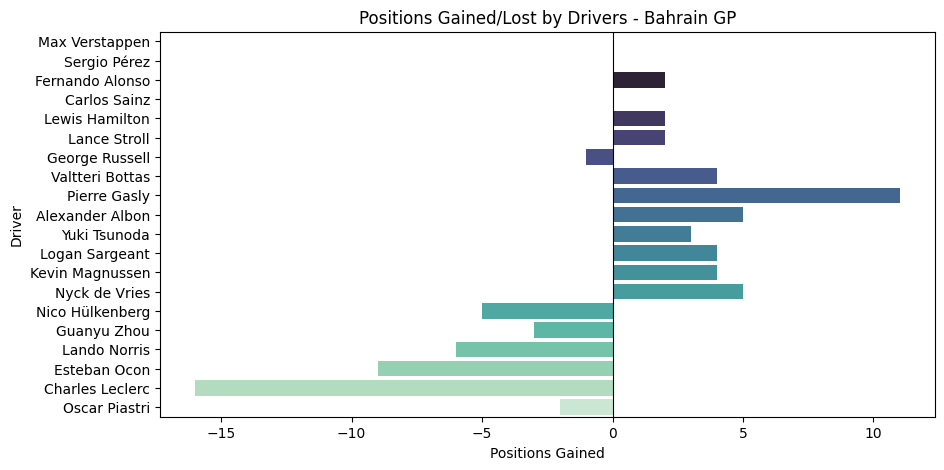

In [11]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x='PositionsGained', 
    y='Driver', 
    data=df_5, 
    palette='mako'
)
plt.xlabel('Positions Gained')
plt.ylabel('Driver')
plt.title('Positions Gained/Lost by Drivers - Bahrain GP')
plt.axvline(0, color='black', linewidth=0.8)  # Línea vertical en 0 para separar ganancias de pérdidas
plt.show()


### Number of DNFs (Did Not Finish)
This analysis shows the number of races each driver did not finish due to various reasons, such as mechanical failures or accidents. It provides an overview of reliability and highlights potential weaknesses in a driver's or team's season.

**Note**: Lapped cars are counted as DNFs even if they cross the finish line, as this analysis considers a DNF to mean not completing all laps.

In [12]:
df_6 = pd.DataFrame(sql_query(query_6))
df_6.columns = ['Driver', 'dnf_count']

Query performed successfully.
Database connection closed.


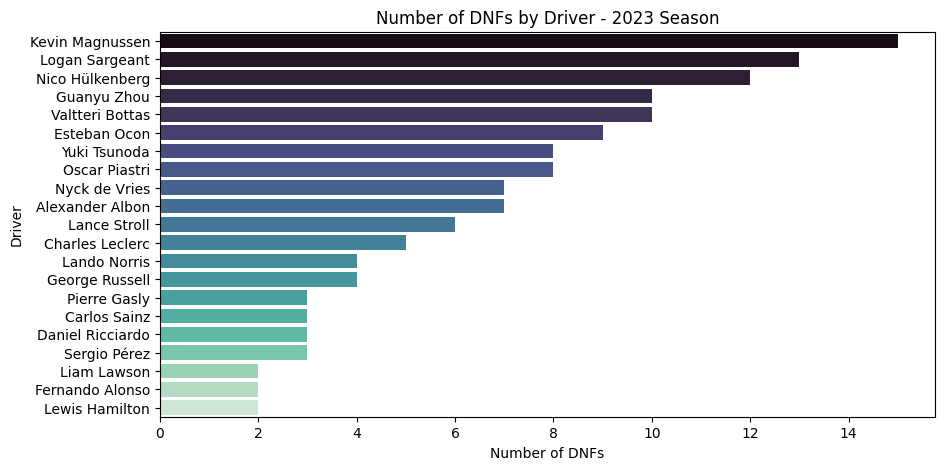

In [13]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x='dnf_count', 
    y='Driver', 
    data=df_6, 
    palette='mako'
)
plt.xlabel('Number of DNFs')
plt.ylabel('Driver')
plt.title('Number of DNFs by Driver - 2023 Season')
plt.show()


We can see that `Kevin Magnussen` and `Logan Sargeant` frequently did not finish races (at least not on the lead lap), highlighting the poor performance and reliability of their cars.

Notably, `Max Verstappen` does not appear in this analysis, as he completed every race during the season.

### Average Points per Race
This analysis displays the average points scored by each driver per race, providing insight into their consistency and overall scoring ability throughout the season.

In [14]:
df_7 = pd.DataFrame(sql_query(query_7))
df_7.columns = ['Driver', 'avg_points']

Query performed successfully.
Database connection closed.


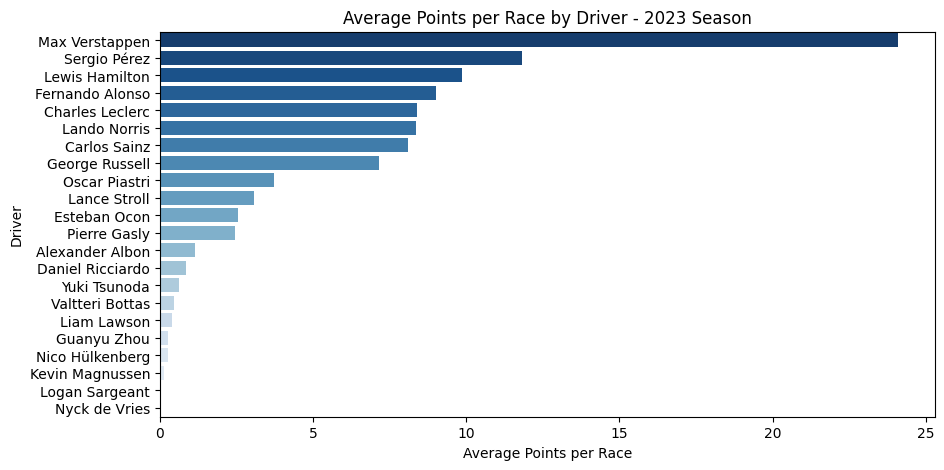

In [15]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x='avg_points', 
    y='Driver', 
    data=df_7, 
    palette='Blues_r'
)
plt.xlabel('Average Points per Race')
plt.ylabel('Driver')
plt.title('Average Points per Race by Driver - 2023 Season')
plt.show()


`Max Verstappen` managed to secure nearly all the possible points per race (with a maximum of 26 points for a win plus the fastest lap), showcasing not only the superiority of his car but also his exceptional talent and skill.

### Number of Wins
This analysis shows how many times each driver won a race during the season, highlighting their ability to secure victories and dominate individual events.

In [16]:
df_8 = pd.DataFrame(sql_query(query_8))
df_8.columns = ['Driver', 'wins']

Query performed successfully.
Database connection closed.


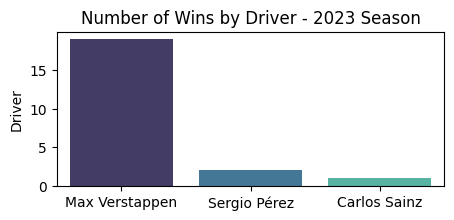

In [17]:
plt.figure(figsize=(5, 2))
sns.barplot(
    y='wins', 
    x='Driver', 
    data=df_8, 
    palette='mako'
)
plt.xlabel('')
plt.ylabel('Driver')
plt.title('Number of Wins by Driver - 2023 Season')
plt.show()


Another proof of `Max Verstappen`'s talent. `Carlos Sainz`'s victory stands out as the only non-`Red Bull` win of the season.

### Number of Podiums
This analysis displays the number of times each driver finished in the top three positions, providing insight into their consistency and competitiveness throughout the season.

In [18]:
df_9 = pd.DataFrame(sql_query(query_9))
df_9.columns = ['Driver', 'podiums']

Query performed successfully.
Database connection closed.


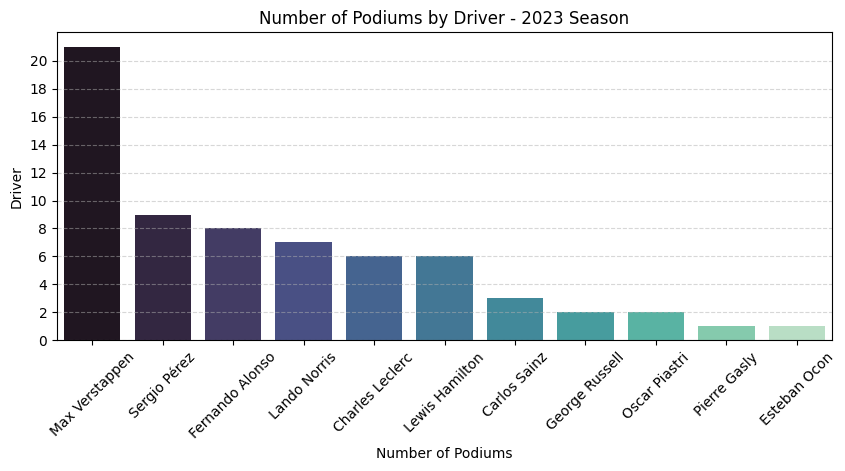

In [19]:
plt.figure(figsize=(10, 4))
sns.barplot(
    y='podiums', 
    x='Driver', 
    data=df_9, 
    palette='mako'
)
plt.xlabel('Number of Podiums')
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 22, step=2))
plt.ylabel('Driver')
plt.title('Number of Podiums by Driver - 2023 Season')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Again, `Max Verstappen`'s dominance is evident, as he secured a podium finish in nearly every race. While `Carlos Sainz` does not rank as highly in this metric, both `Fernando Alonso` and `Lando Norris` stand out for their consistency at the top of the field.

### Total Positions Gained Throughout the Season
This analysis shows the total number of positions gained by each driver across all races, providing insight into their overtaking ability and racecraft throughout the season.

In [20]:
df_10 = pd.DataFrame(sql_query(query_10))
df_10.columns = ['Driver', 'total_positions_gained']

Query performed successfully.
Database connection closed.


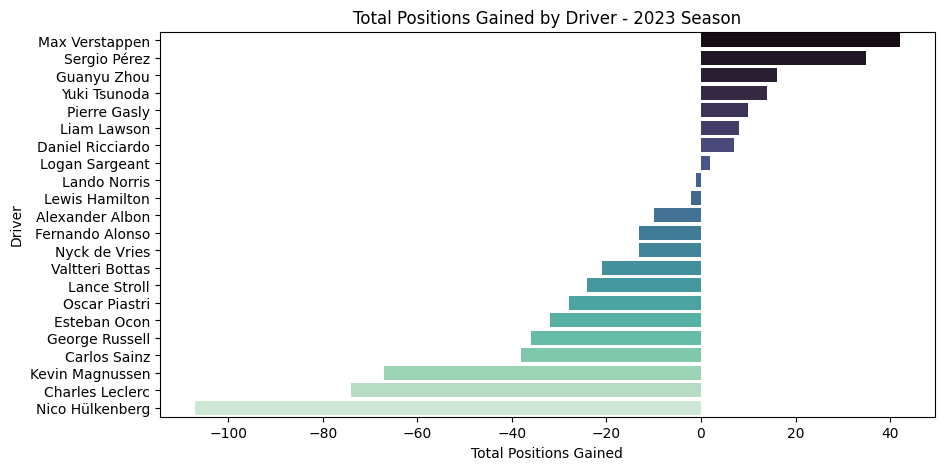

In [21]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x='total_positions_gained', 
    y='Driver', 
    data=df_10, 
    palette='mako'
)
plt.xlabel('Total Positions Gained')
plt.ylabel('Driver')
plt.title('Total Positions Gained by Driver - 2023 Season')
plt.show()

Surprisingly, `Max Verstappen` is the driver with the most positions gained, despite typically qualifying well. On the other hand, `Ferrari` drivers `Carlos Sainz` and `Charles Leclerc`, along with `Haas` drivers `Kevin Magnussen` and `Nico Hulkenberg`, showed significant position losses throughout the season.

### Distribution of Positions Gained/Lost
This analysis takes a deeper look into the distribution of positions gained or lost by drivers throughout the season, providing a clearer view of race dynamics and driver performance trends across different races.

In [22]:
df_11 = pd.DataFrame(sql_query(query_11))
df_11.columns = ['Driver', 'Positions Gained/Lost']

Query performed successfully.
Database connection closed.


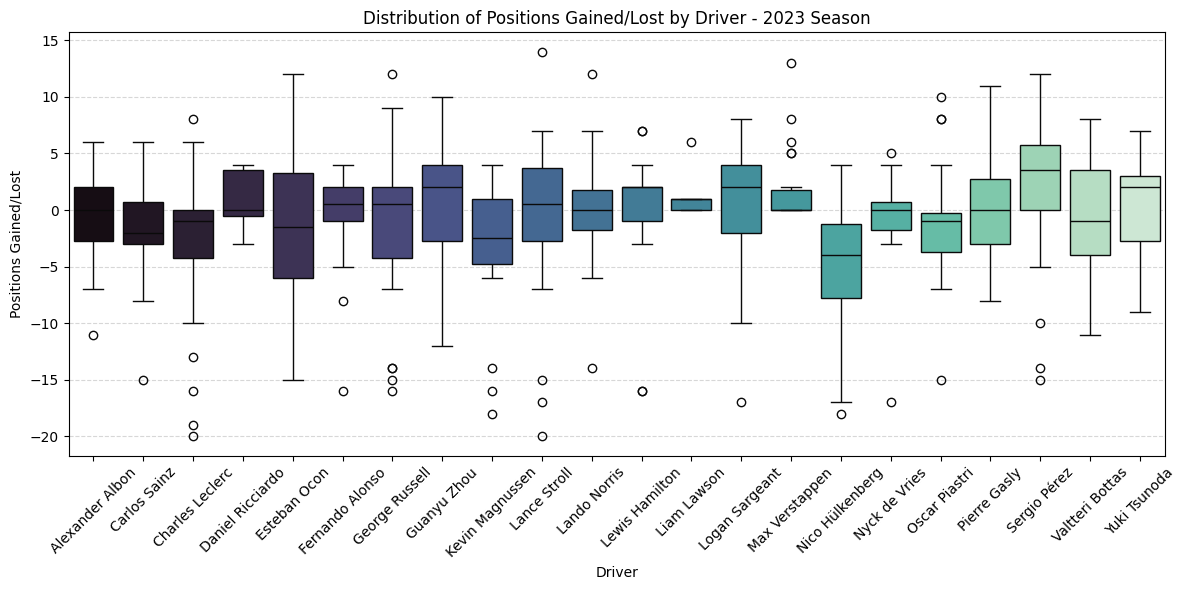

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='Driver', 
    y='Positions Gained/Lost', 
    data=df_11, 
    palette='mako'
)
plt.xlabel('Driver')
plt.ylabel('Positions Gained/Lost')
plt.title('Distribution of Positions Gained/Lost by Driver - 2023 Season')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

This deeper analysis reveals that the previous result is influenced by outliers, likely due to races impacted by incidents, DNFs, or poor strategies. Notably, this trend does not apply to `Verstappen`, who managed to win nearly every race, even achieving significant comebacks from the back of the grid on days when he had poor qualifying results.

### Pole Position Effectiveness
This analysis evaluates the effectiveness of drivers who started from pole position by showing their final positions at the end of each race.

In [24]:
df_12 = pd.DataFrame(sql_query(query_12))
df_12.columns = ['Driver', 'Race Name', 'End Position']

Query performed successfully.
Database connection closed.


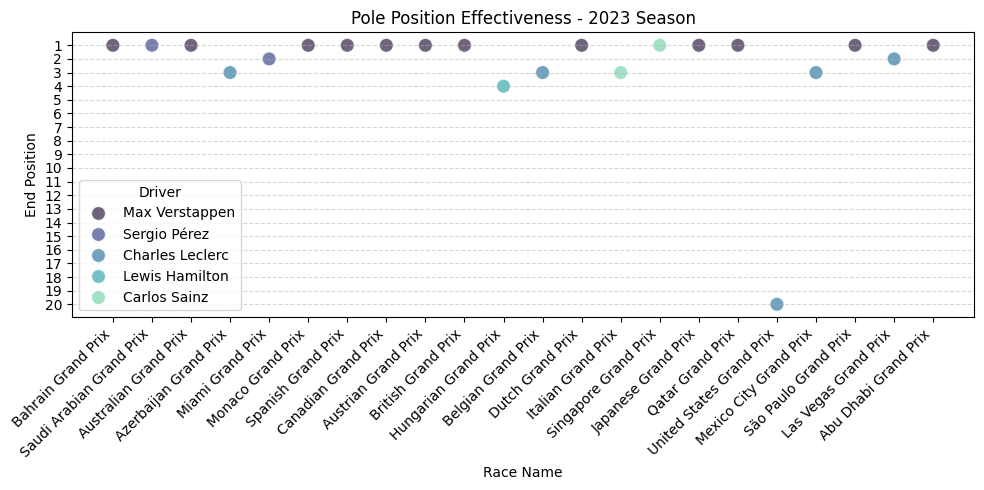

In [25]:
plt.figure(figsize=(10, 5))
sns.scatterplot(
    x='Race Name', 
    y='End Position', 
    hue='Driver', 
    data=df_12, 
    palette='mako', 
    s=100, 
    alpha=0.7
)
plt.xlabel('Race Name')
plt.ylabel('End Position')
plt.title('Pole Position Effectiveness - 2023 Season')
plt.gca().invert_yaxis()
plt.xticks(rotation=45, ha='right')
plt.yticks(np.arange(1, 21, 1))
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

`Max Verstappen` almost always converted pole position into victory. Generally, starting from pole position leads to strong results and secures top 4 finishes. The only exception was `Leclerc` at the `United States GP`, where he finished 6th but was later disqualified due to a technical infringement (see [2023 United States Grand Prix](https://en.wikipedia.org/wiki/2023_United_States_Grand_Prix)
).

### Drivers Championship Evolution
This analysis tracks the cumulative points of each driver after every round of the season. It visualizes how the championship standings evolved over time, highlighting which drivers gained or lost momentum throughout the season.

In [26]:
df_13 = pd.DataFrame(sql_query(query_13))
df_13.columns = ['Round', 'Driver', 'Cumulative Points']

Query performed successfully.
Database connection closed.


In [47]:
# Dictionary for teams palette
team_colors = {
    'Red Bull': '#1E41FF',
    'Mercedes': '#00D2BE',
    'Ferrari': '#DC0000',
    'McLaren': '#FF8700',
    'Alpine F1 Team': '#0090FF',
    'Aston Martin': '#006F62',
    'AlphaTauri': '#4E7C9B',
    'Williams': '#005AFF',
    'Alfa Romeo': '#900000',
    'Haas F1 Team': '#B6BABD'
}

# Diccionary for drivers coloring
driver_team_styles = {
    'Max Verstappen': ('Red Bull', '-'),
    'Sergio Pérez': ('Red Bull', '--'),
    'Lewis Hamilton': ('Mercedes', '-'),
    'George Russell': ('Mercedes', '--'),
    'Charles Leclerc': ('Ferrari', '-'),   
    'Carlos Sainz': ('Ferrari', '--'),
    'Lando Norris': ('McLaren', '-'),     
    'Oscar Piastri': ('McLaren', '--'),
    'Fernando Alonso': ('Aston Martin', '-'),
    'Lance Stroll': ('Aston Martin', '--'),
}

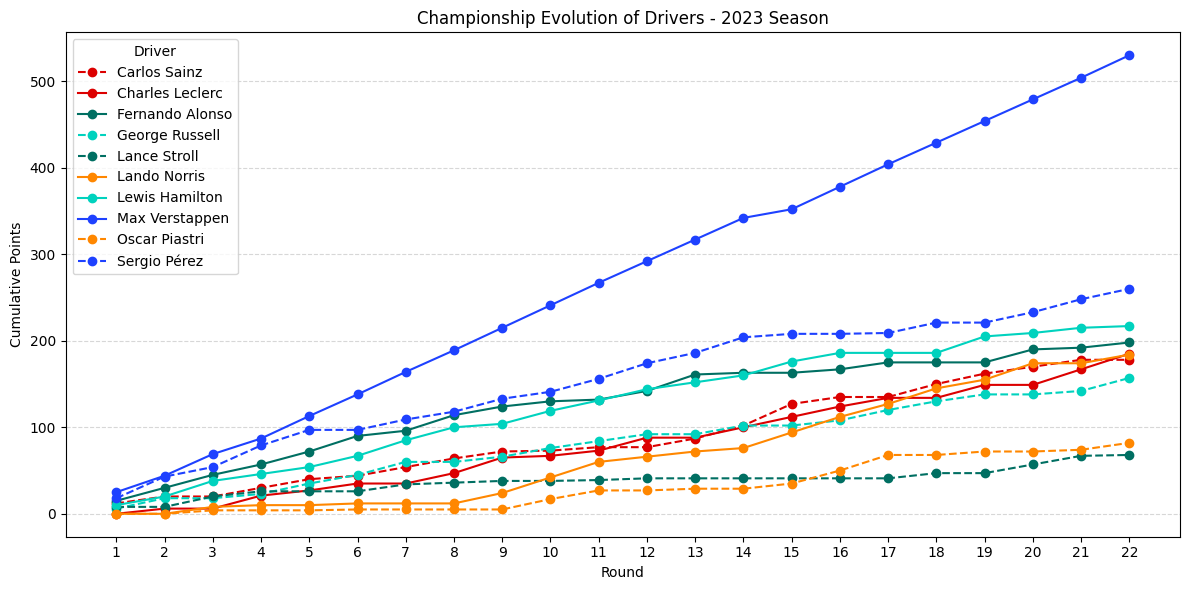

In [48]:
plt.figure(figsize=(12, 6))
for driver in df_13['Driver'].unique():
    if driver in driver_team_styles:
        team, line_style = driver_team_styles[driver]
        color = team_colors.get(team, 'black')  # Usar color negro como predeterminado si no se encuentra el equipo
        driver_data = df_13[df_13['Driver'] == driver]
        plt.plot(
            driver_data['Round'],
            driver_data['Cumulative Points'],
            label=driver,
            color=color,
            linestyle=line_style,
            marker='o'
        )

plt.xlabel('Round')
plt.ylabel('Cumulative Points')
plt.title('Championship Evolution of Drivers - 2023 Season')
plt.legend(title='Driver')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(df_13['Round'].unique())
plt.tight_layout()
plt.show()


We observe `Verstappen`'s rapid ascent in the championship standings. The comeback by `McLaren` drivers `Lando Norris` and `Oscar Piastri` starting from race 9 is remarkable, while `Aston Martin` drivers `Alonso` and `Stroll` struggled as their car development stalled.

### Constructors Championship Evolution
This analysis tracks the cumulative points of each constructor after every round of the season. It visualizes how the championship standings evolved over time, highlighting which teams gained or lost momentum throughout the season.

In [28]:
df_14 = pd.DataFrame(sql_query(query_14))
df_14.columns = ['Round', 'Constructor', 'Cumulative Points']

Query performed successfully.
Database connection closed.


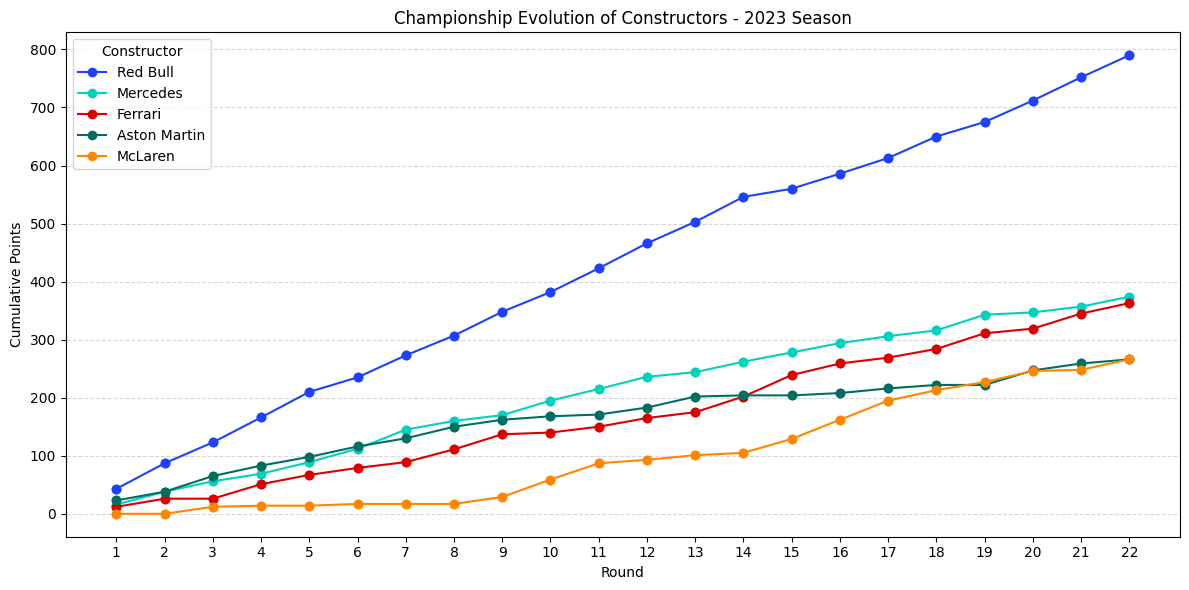

In [37]:
# Filter top 5 constructors
top_constructors = df_14.groupby('Constructor')['Cumulative Points'].max().sort_values(ascending=False).head(5).index
df_top_constructors = df_14[df_14['Constructor'].isin(top_constructors)]

plt.figure(figsize=(12, 6))
for constructor in top_constructors:
    constructor_data = df_top_constructors[df_top_constructors['Constructor'] == constructor]
    plt.plot(
        constructor_data['Round'], 
        constructor_data['Cumulative Points'], 
        marker='o', 
        label=constructor, 
        color=team_colors.get(constructor, 'black')  # Color predeterminado negro si no se encuentra el equipo
    )

plt.xlabel('Round')
plt.ylabel('Cumulative Points')
plt.title('Championship Evolution of Constructors - 2023 Season')
plt.legend(title='Constructor')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(df_14['Round'].unique())
plt.tight_layout()
plt.show()


Here, we can clearly see `Aston Martin`'s development issues and the epic comeback by `McLaren`.